### 데이터 만들기

In [21]:
import seaborn as sns
sns.set_style('whitegrid')

rng = np.random.RandomState(13)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
X.shape


(200, 2)

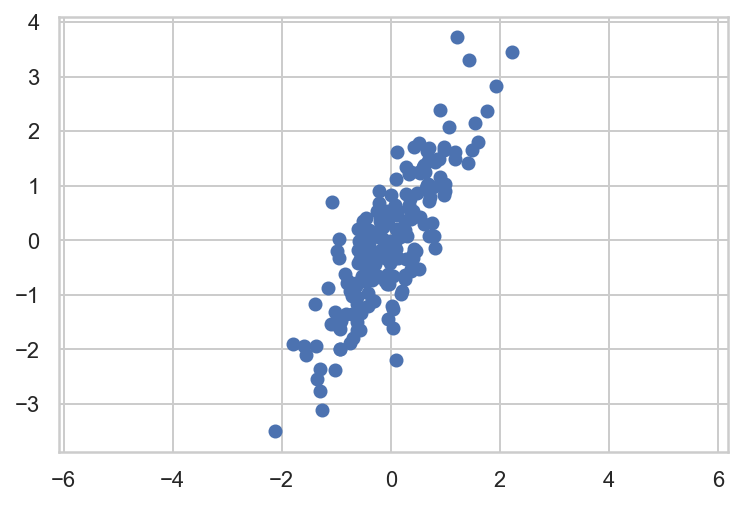

In [24]:
plt.scatter(X[:,0], X[:,1])
plt.axis('equal')
plt.show()

### PCA fit

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=13)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=13,
    svd_solver='auto', tol=0.0, whiten=False)

### 벡터와 분산값

In [27]:
pca.components_

array([[ 0.47802511,  0.87834617],
       [-0.87834617,  0.47802511]])

In [28]:
pca.explained_variance_

array([1.82531406, 0.13209947])

### 주성분 벡터 표시

In [30]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops  = dict(arrowstyle='->',
                      linewidth=2, color='black',
                      shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

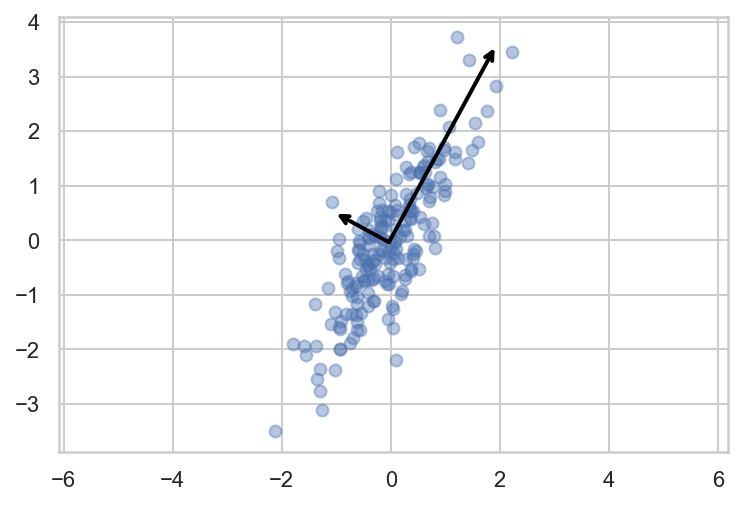

In [36]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.4,)
for lenght, vector in zip(pca.explained_variance_, pca.components_):
    v = vector*3*np.sqrt(lenght)
    draw_vector(pca.mean_,pca.mean_+v)
    
plt.axis('equal')
plt.show()

# iris 데이터 실습

In [38]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

iris_pd = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_pd['species'] = iris.target
iris_pd.head(3)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   

   species  
0        0  
1        0  
2        0

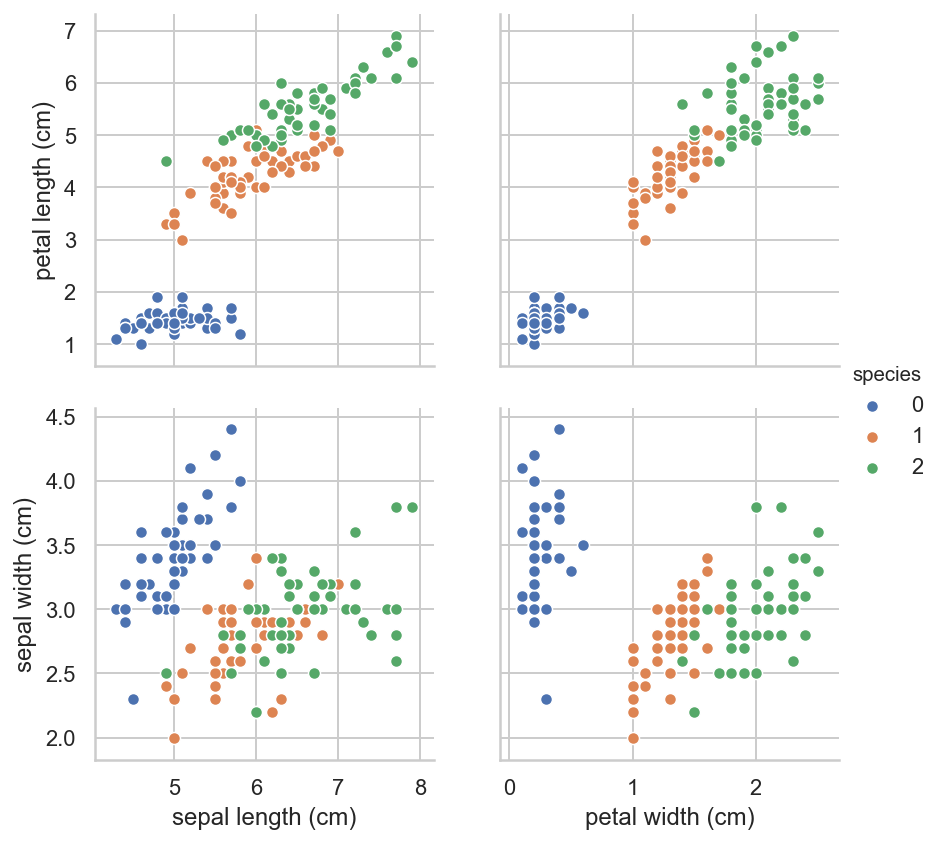

In [39]:
sns.pairplot(iris_pd, hue='species', height=3,
            x_vars=['sepal length (cm)', 'petal width (cm)'],
            y_vars=['petal length (cm)', 'sepal width (cm)'])

### iris feature에 standard scale을 적용

In [40]:
from sklearn.preprocessing import StandardScaler

iris_ss = StandardScaler().fit_transform(iris.data)
iris_ss[:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

### pca 결과를 return 하는 함수

In [41]:
from sklearn.decomposition import PCA

def get_pca_data(ss_data, n_components=2):
    pca = PCA(n_components=n_components)
    pca.fit(ss_data)
    
    return pca.transform(ss_data), pca

### return 값 확인 하기

In [43]:
iris_pca, pca = get_pca_data(iris_ss, n_components=2)
iris_pca.shape

(150, 2)

In [44]:
pca.mean_

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

In [45]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

### pca결과를 pandas로 정리

In [46]:
def get_pd_from_pca(pca_data, cols=['pca_component_1', 'pca_component_2']):
    return pd.DataFrame(pca_data, columns=cols)


In [47]:
iris_pd_pca = get_pd_from_pca(iris_pca)
iris_pd_pca['species'] = iris.target
iris_pd_pca.head(3)


pca_component_1  pca_component_2  species
0        -2.264703         0.480027        0
1        -2.080961        -0.674134        0
2        -2.364229        -0.341908        0

### 두 개의 특성을 그려보자

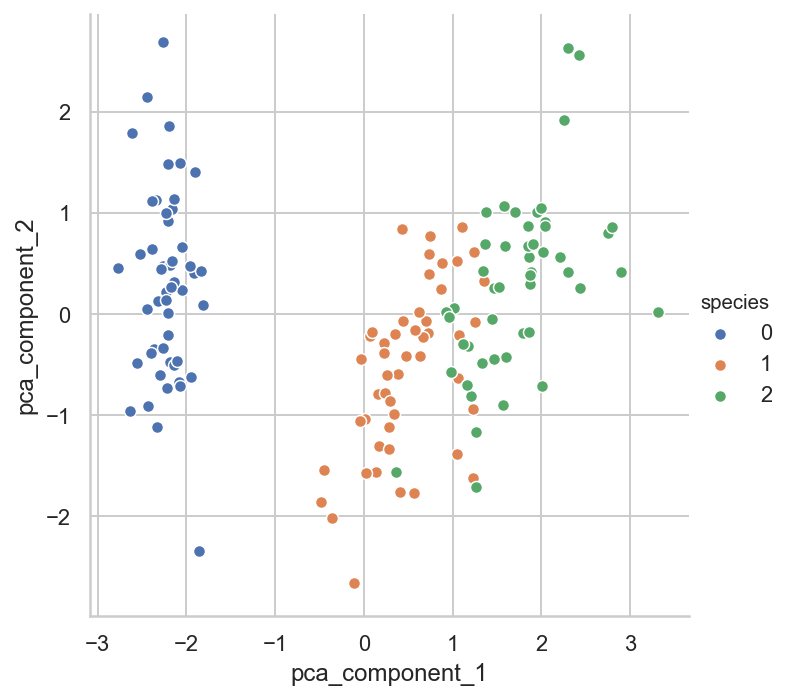

In [48]:
sns.pairplot(iris_pd_pca, hue='species', height=5, x_vars=['pca_component_1'],
            y_vars=['pca_component_2']);

### 두개의 축으로 줄였을때 전체의 95.8% 정도 표현이 가능

In [50]:
import numpy as np

def print_variance_ratio(pca):
    print('variance_ratio : ', pca.explained_variance_ratio_)
    print('sum of variance_ratio : ', np.sum(pca.explained_variance_ratio_))
    
print_variance_ratio(pca)

variance_ratio :  [0.72962445 0.22850762]
sum of variance_ratio :  0.9581320720000164


### 4개의 특성을 모두 사용해서 randomforest에 적용하면 
     - 교차성능의 평균은 0.96

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def rf_scores(X, y, cv=5):
    rf = RandomForestClassifier(random_state=13, n_estimators=100)
    scores_rf = cross_val_score(rf, X, y, scoring='accuracy', cv=cv)
    
    print('Score : ' , np.mean(scores_rf))
    
rf_scores(iris_ss, iris.target)

Score :  0.96


### 2개의 특성만 적용 하였을때
    - 교차성능의 평균은 0.906

In [52]:
pca_X = iris_pd_pca[['pca_component_1', 'pca_component_2']]

rf_scores(pca_X, iris.target)

Score :  0.9066666666666666


# wine data 실습

In [53]:
wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'
wine = pd.read_csv(wine_url, sep=',', index_col=0)
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  color  
0      9.4        5      1  
1      9.8        5      1  
2      9.8        5      1  
3      9.8        6      1  
4      9.4        5      1

### 종속변수 color로 설정

In [54]:
wine_y = wine['color']
wine_X = wine.drop(['color'], axis=1)
wine_X.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

### StandardScaler 적용

In [55]:
wine_ss = StandardScaler().fit_transform(wine_X)
wine_ss[:3]

array([[ 0.14247327,  2.18883292, -2.19283252, -0.7447781 ,  0.56995782,
        -1.10013986, -1.44635852,  1.03499282,  1.81308951,  0.19309677,
        -0.91546416, -0.93722961],
       [ 0.45103572,  3.28223494, -2.19283252, -0.59764007,  1.1979747 ,
        -0.31132009, -0.86246863,  0.70148631, -0.11507303,  0.99957862,
        -0.58006813, -0.93722961],
       [ 0.45103572,  2.55330026, -1.91755268, -0.66069923,  1.02669737,
        -0.87476278, -1.09248586,  0.76818761,  0.25811972,  0.79795816,
        -0.58006813, -0.93722961]])

### 두개의 주성분으로 줄이니 데이터의 50%도 표현을 못함

In [56]:
pca_wine, pca = get_pca_data(wine_ss, n_components=2)
print_variance_ratio(pca)

variance_ratio :  [0.25346226 0.22082117]
sum of variance_ratio :  0.4742834274323616


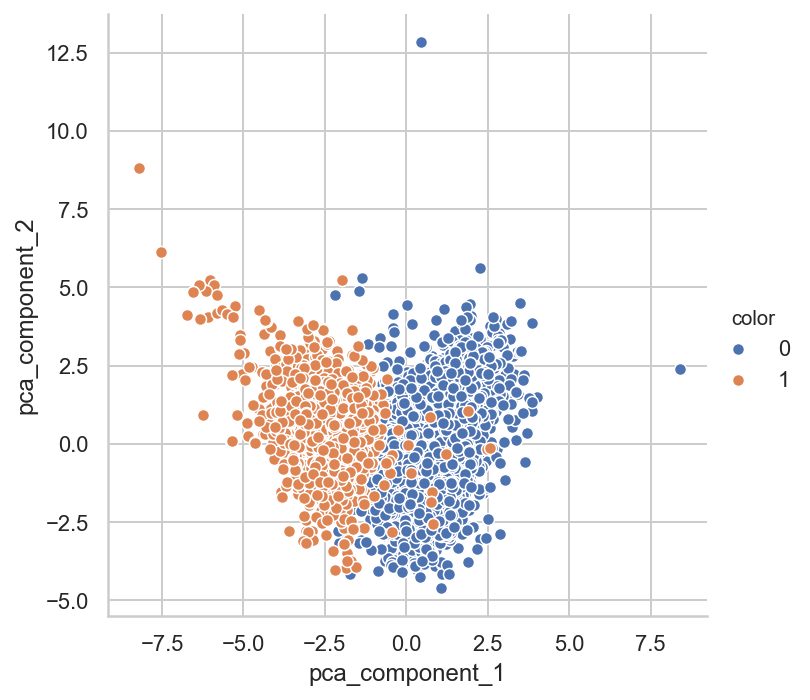

In [57]:
pca_columns = ['pca_component_1', 'pca_component_2']
pca_wine_pd = pd.DataFrame(pca_wine, columns=pca_columns)
pca_wine_pd['color'] = wine_y.values

sns.pairplot(pca_wine_pd, hue='color',
             height=5, x_vars=['pca_component_1'], y_vars=['pca_component_2'])

### 하지만 RandomForest에 적용했을때 원 데이터와 큰 차이가 없다.

In [58]:
rf_scores(wine_ss, wine_y)

Score :  0.9935352638124


In [59]:
pca_X = pca_wine_pd[['pca_component_1', 'pca_component_2']]
rf_scores(pca_X, wine_y)

Score :  0.981067803635933


### 주성분 3개로 표현을 해봤더니 98%이상 표현이 가능하다.

In [60]:
pca_wine, pca = get_pca_data(wine_ss, n_components=3)
print_variance_ratio(pca)

cols = ['pca_1','pca_2','pca_3']
pca_wine_pd = get_pd_from_pca(pca_wine, cols=cols)

pca_X = pca_wine_pd[cols]
rf_scores(pca_X, wine_y)

variance_ratio :  [0.25346226 0.22082117 0.13679223]
sum of variance_ratio :  0.6110756621838699
Score :  0.9832236631728548


In [61]:
pca_wine_plot = pca_X
pca_wine_plot['color'] = wine_y.values
pca_wine_plot.head()


pca_1     pca_2     pca_3  color
0 -3.348438  0.568926 -2.727386      1
1 -3.228595  1.197335 -1.998904      1
2 -3.237468  0.952580 -1.746578      1
3 -1.672561  1.600583  2.856552      1
4 -3.348438  0.568926 -2.727386      1

### 3D로 그려보자

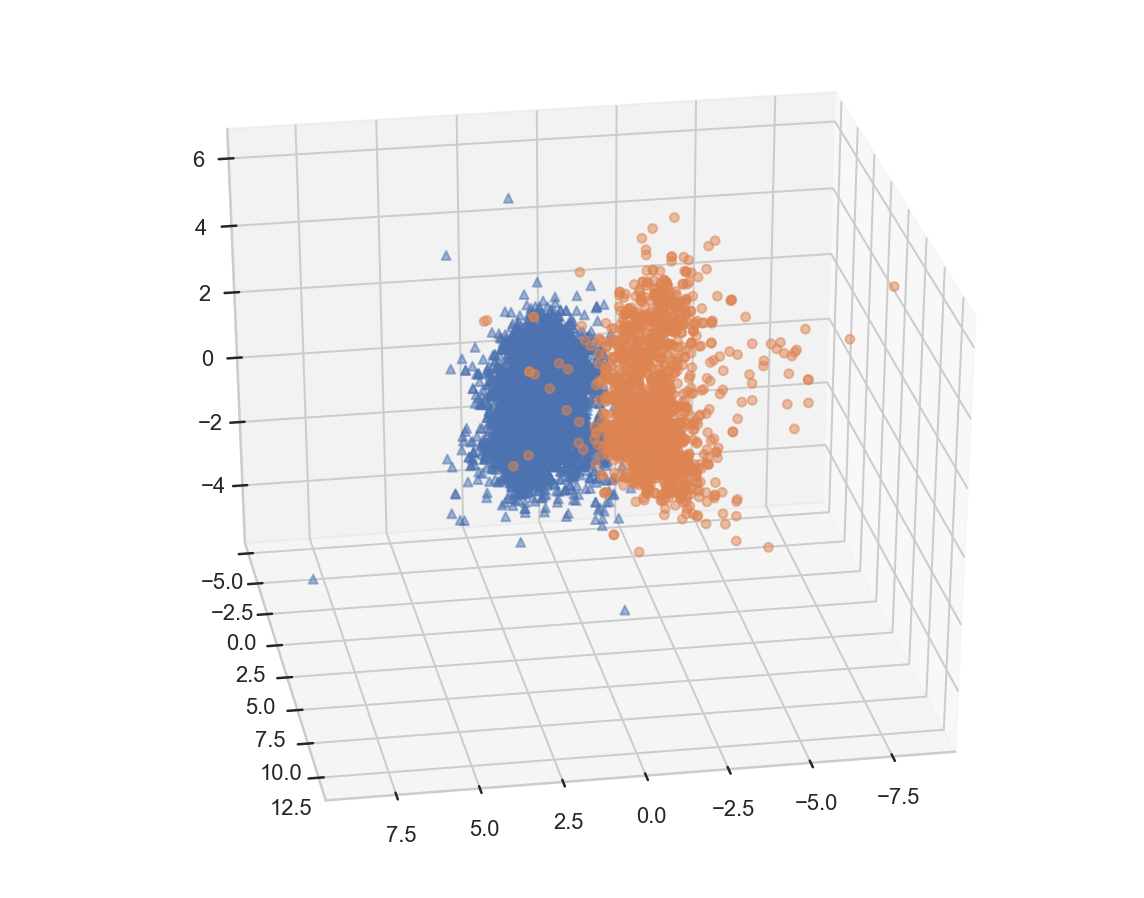

In [62]:
from mpl_toolkits.mplot3d import Axes3D


markers = ['^', 'o']

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

for i, marker in enumerate(markers):
    x_axis_data = pca_wine_plot[pca_wine_plot['color']==i]['pca_1']
    y_axis_data = pca_wine_plot[pca_wine_plot['color']==i]['pca_2']
    z_axis_data = pca_wine_plot[pca_wine_plot['color']==i]['pca_3']
    
    ax.scatter(x_axis_data, y_axis_data, z_axis_data, s=20, alpha=0.5, marker=marker)
    
ax.view_init(30, 80)
plt.show()

### plotly express를 이용해서 그려 보았다

In [63]:

import plotly.express as px

fig = px.scatter_3d(pca_wine_plot, x='pca_1', y='pca_2', z='pca_3', color='color', symbol='color', opacity=0.4)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

11.0